                                                    
                                                    Heart_Disease_Analysis

In [6]:
# importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
# reading the dataset
data=pd.read_csv('heart.csv')

In [8]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
data.shape

(1025, 14)

# Number of columns is 14 and  number of rows is 1025

In [11]:
# age- numerical data
#sex-  categorical
# cp(chest pain)angina- categorical data(Angina is a type of chest pain caused by reduced blood flow to the heart. )
        #1: Typical angina: chest pain related decrease blood supply to the heart
        #2: Atypical angina: chest pain not related to heart
        #3: Non-anginal pain: typically esophageal spasms (non heart related)
        #4: Asymptomatic: chest pain not showing signs of disease
# trestbps(resting blood sugar)- numerical data
# chol(cholestrol)-numerical data
# fbs(fasting blood sugar)- bool
#restecg(Resting electrocardiographic measurement)- categorical data
        #0: Nothing to note
        #1: ST-T Wave abnormality
            #can range from mild symptoms to severe problem - signals non-normal heart beat
        #2: Possible or definite left ventricular hypertrophy - Enlarged heart's main pumping chamber
#thalach(The person's maximum heart rate achieved)- numerical data
#exang(Exercise induced angina,occur due to exercise or heavy workout)- bool
#oldpeak(ST depression)- numerical
#slope- categorical data - the slope of the peak exercise ST segment
       #0: Upsloping: better heart rate with excercise (uncommon)
       #1: Flatsloping: minimal change (typical healthy heart)
       #2: Downslopins: signs of unhealthy heart
#ca(The number of major vessels (0-3))- numerical data - number of major vessels (0-3) colored by flourosopy
       #colored vessel means the doctor can see the blood passing through
       #the more blood movement the better (no clots)
#thal(A blood disorder called thalassemia)- categorical data
       #1,3: normal
       #6: fixed defect: used to be defect but ok now
       #7: reversable defect: no proper blood movement when excercising
#num(target)-bool

# 6 numerical variables , 3 bool, 5 categorical data
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.columns


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [12]:
pd.set_option('display.max_columns',None)

In [13]:
pd.set_option('display.max_rows',None)

In [14]:
data.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
# converting int to bool datatype as it takes less memory
data['exercise_induced_angina']=data.exercise_induced_angina.astype(bool)
data['fasting_blood_sugar']=data['fasting_blood_sugar'].astype(bool)
data['target']=data.target.astype(bool)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   chest_pain_type          1025 non-null   int64  
 3   resting_blood_sugar      1025 non-null   int64  
 4   cholesterol              1025 non-null   int64  
 5   fasting_blood_sugar      1025 non-null   bool   
 6   rest_ecg                 1025 non-null   int64  
 7   max_heart_rate_achieved  1025 non-null   int64  
 8   exercise_induced_angina  1025 non-null   bool   
 9   st_depression            1025 non-null   float64
 10  st_slope                 1025 non-null   int64  
 11  num_major_vessels        1025 non-null   int64  
 12  thalassemia              1025 non-null   int64  
 13  target                   1025 non-null   bool   
dtypes: bool(3), float64(1), 

In [17]:
# finding out the missing values

data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_sugar        0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [18]:

missing_values=pd.DataFrame(data.isnull().sum()*100/data.shape[0]).reset_index()
missing_values

,index,0
0,age,0.0
1,sex,0.0
2,chest_pain_type,0.0
3,resting_blood_sugar,0.0
4,cholesterol,0.0
5,fasting_blood_sugar,0.0
6,rest_ecg,0.0
7,max_heart_rate_achieved,0.0
8,exercise_induced_angina,0.0
9,st_depression,0.0


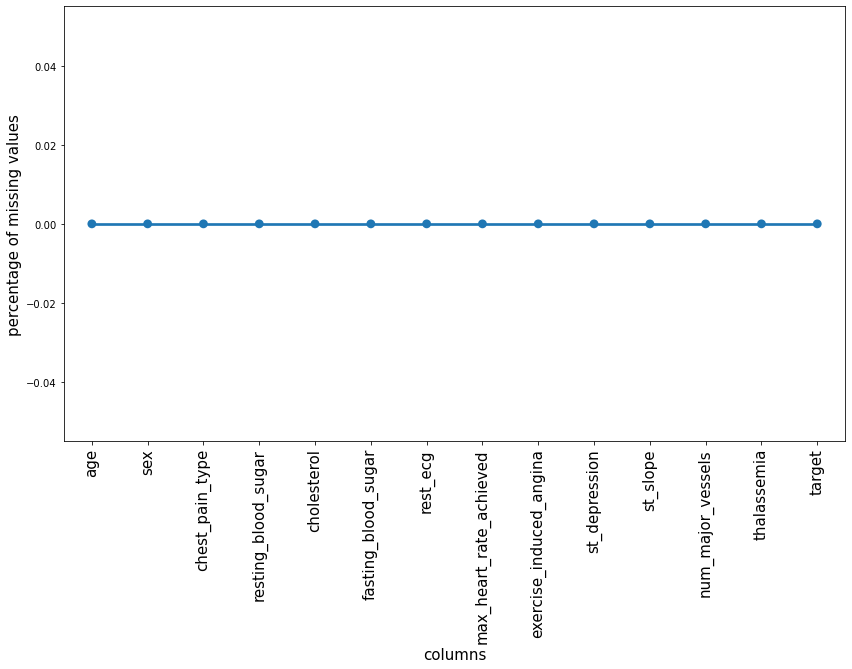

In [19]:
# visualizing null values if it exists
plt.figure(figsize=(14,8))
ax=sns.pointplot(x="index",y=0,data=missing_values)
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("columns",fontsize=15)
plt.ylabel("percentage of missing values",fontsize=15)
plt.show()

# Data Profiling

In [20]:
data['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

<AxesSubplot:>

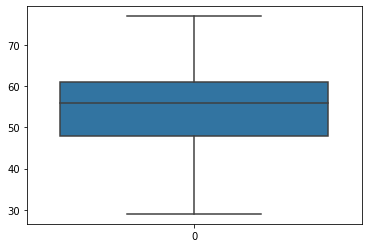

In [21]:
sns.boxplot(data=data['age'])

# no outliers in age column

In [22]:
data['age'].value_counts().count()

41

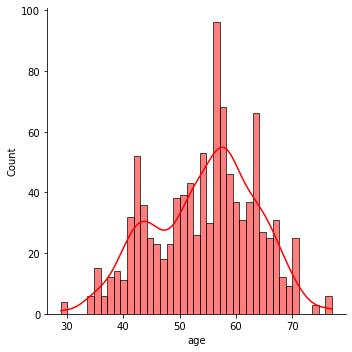

In [23]:

sns.displot(data['age'],bins=41,color="red", kde=True)

In [24]:
data['sex'].describe()

count    1025.000000
mean        0.695610
std         0.460373
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [25]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

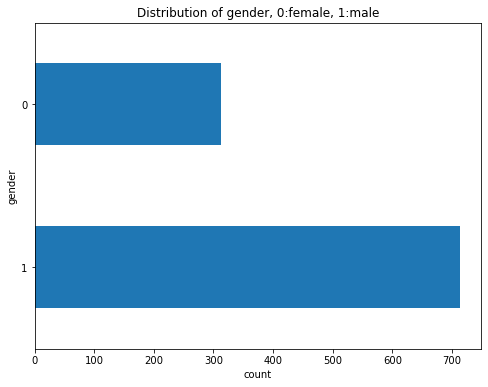

In [26]:
data['sex'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("gender")
plt.title("Distribution of gender, 0:female, 1:male")
plt.show()

In [27]:
data['chest_pain_type'].describe()

count    1025.000000
mean        0.942439
std         1.029641
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: chest_pain_type, dtype: float64

In [28]:
data['chest_pain_type'].value_counts()

0    497
2    284
1    167
3     77
Name: chest_pain_type, dtype: int64

Text(0, 0.5, '1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic')

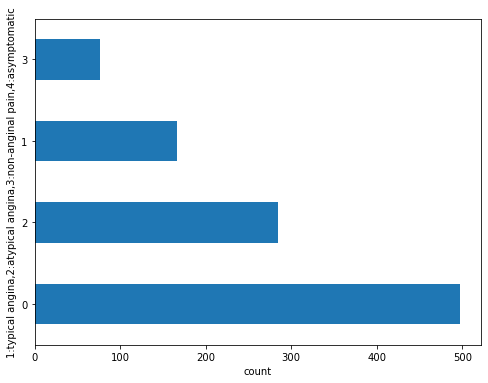

In [29]:
data['chest_pain_type'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("count")
plt.ylabel("1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic")

In [30]:
data['resting_blood_sugar'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: resting_blood_sugar, dtype: float64

<AxesSubplot:>

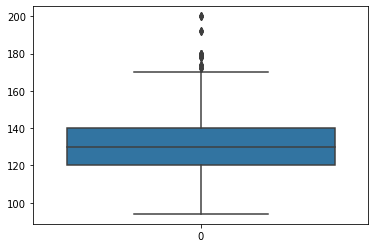

In [31]:
sns.boxplot(data=data['resting_blood_sugar'])

# Outliers found in resting_blood_sugar column

In [32]:
data['resting_blood_sugar'].value_counts().count()

49

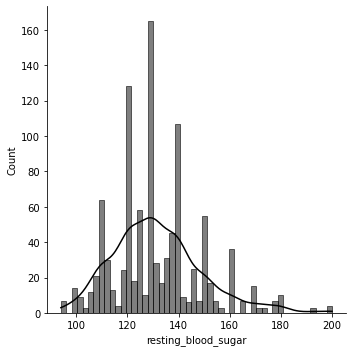

In [33]:
sns.displot(data['resting_blood_sugar'],bins=50,color="black", kde=True)

In [34]:
data['cholesterol'].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: cholesterol, dtype: float64

<AxesSubplot:>

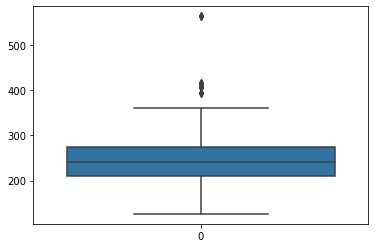

In [35]:
sns.boxplot(data=data['cholesterol'])

# Outliers in cholesterol column

In [36]:
data['cholesterol'].value_counts().count()

152

In [37]:
data['cholesterol'].max()

564

In [38]:
data['cholesterol'].min()

126

In [39]:
data['cholesterol'].min()

126

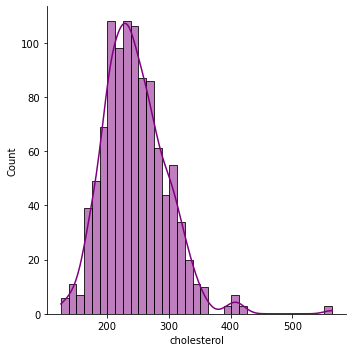

In [40]:
sns.displot(data['cholesterol'],color="purple",kde=True)

In [41]:
data['fasting_blood_sugar'].describe()

count      1025
unique        2
top       False
freq        872
Name: fasting_blood_sugar, dtype: object

In [42]:
data['fasting_blood_sugar'].value_counts()

False    872
True     153
Name: fasting_blood_sugar, dtype: int64

Text(0, 0.5, '> 120 mg/dl: true, <120 mg/dl:false')

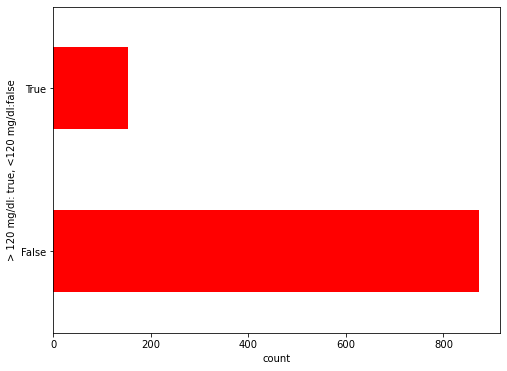

In [43]:
data['fasting_blood_sugar'].value_counts().plot(kind='barh', figsize=(8,6), color="red")
plt.xlabel("count")
plt.ylabel("> 120 mg/dl: true, <120 mg/dl:false")

In [44]:
data['rest_ecg'].describe()

count    1025.000000
mean        0.529756
std         0.527878
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: rest_ecg, dtype: float64

In [45]:
data['rest_ecg'].value_counts()

1    513
0    497
2     15
Name: rest_ecg, dtype: int64

Text(0, 0.5, '0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy')

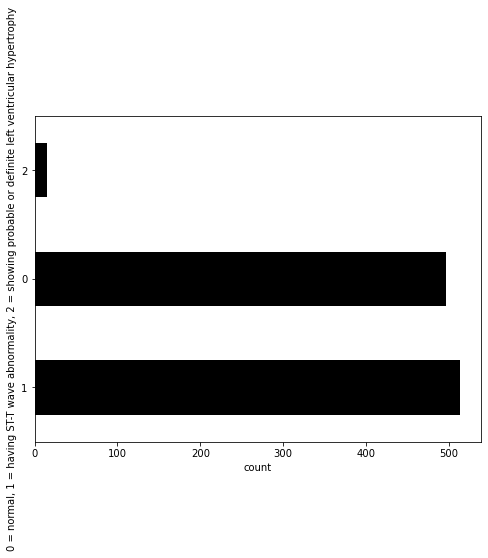

In [46]:
data['rest_ecg'].value_counts().plot(kind="barh",figsize=(8,6),color="black")
plt.xlabel("count")
plt.ylabel("0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy")

In [47]:
data["max_heart_rate_achieved"].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: max_heart_rate_achieved, dtype: float64

<AxesSubplot:>

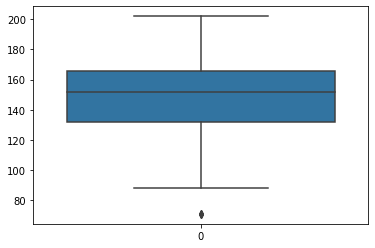

In [48]:
sns.boxplot(data=data["max_heart_rate_achieved"])

# There are few outliers in max_heart_rate_achieved

In [49]:
data["max_heart_rate_achieved"].value_counts().count()

91

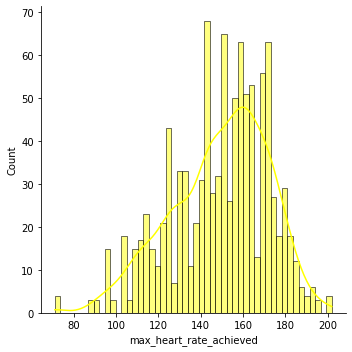

In [50]:
sns.displot(data["max_heart_rate_achieved"], color="yellow",bins=50,kde=True)

In [51]:
data['exercise_induced_angina'].describe()

count      1025
unique        2
top       False
freq        680
Name: exercise_induced_angina, dtype: object

In [52]:
data['exercise_induced_angina'].value_counts()

False    680
True     345
Name: exercise_induced_angina, dtype: int64

Text(0, 0.5, '1 = yes; 0 = no')

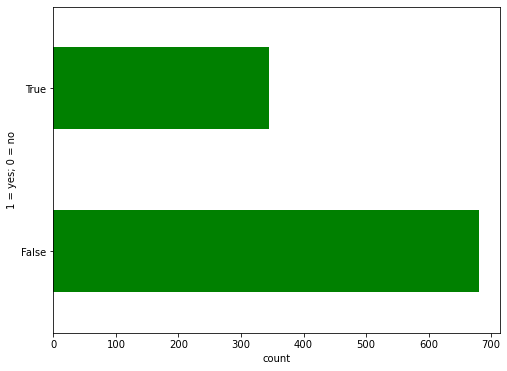

In [53]:
data['exercise_induced_angina'].value_counts().plot(kind="barh",figsize=(8,6),color="green")
plt.xlabel("count")
plt.ylabel("1 = yes; 0 = no")

In [54]:
data['st_depression'].describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: st_depression, dtype: float64

<AxesSubplot:>

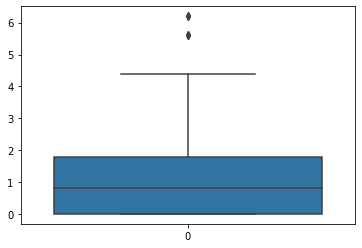

In [55]:
sns.boxplot(data=data['st_depression'])

# Outliers found in st_depression column

In [56]:
data['st_depression'].value_counts().count()

40

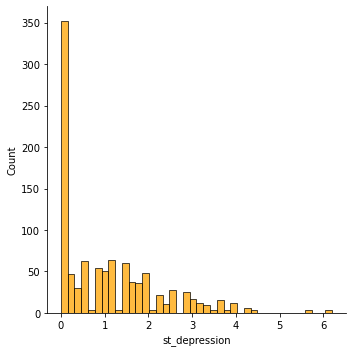

In [57]:
sns.displot(data['st_depression'],bins=40,color="orange")

In [58]:
data["st_slope"].describe()

count    1025.000000
mean        1.385366
std         0.617755
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: st_slope, dtype: float64

In [59]:
data["st_slope"].all()

False

Text(0, 0.5, '1:upsloping, 2:flat, 3:downsloping')

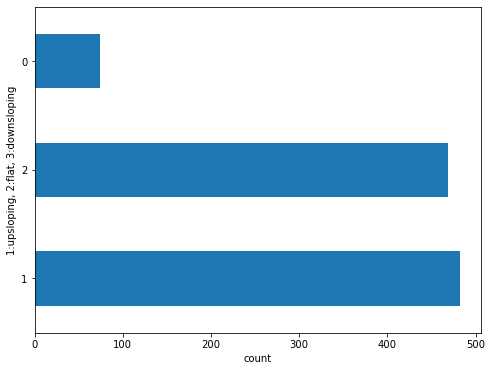

In [60]:
data['st_slope'].value_counts().plot(kind="barh",figsize=(8,6))
plt.xlabel("count")
plt.ylabel("1:upsloping, 2:flat, 3:downsloping")

In [61]:
data['num_major_vessels'].describe()

count    1025.000000
mean        0.754146
std         1.030798
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: num_major_vessels, dtype: float64

<AxesSubplot:>

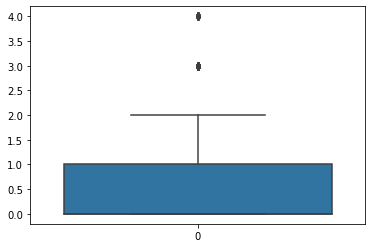

In [62]:
sns.boxplot(data=data['num_major_vessels'])

In [63]:
data['num_major_vessels'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: num_major_vessels, dtype: int64

In [64]:
data['num_major_vessels'].value_counts().count()

5

In [65]:
data['num_major_vessels']=abs(data['num_major_vessels'])

In [66]:
data['num_major_vessels'].min()

0

In [67]:
data['num_major_vessels'].max()

4

In [68]:
data['num_major_vessels'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: num_major_vessels, dtype: int64

In [69]:
data['num_major_vessels'].describe()

count    1025.000000
mean        0.754146
std         1.030798
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: num_major_vessels, dtype: float64

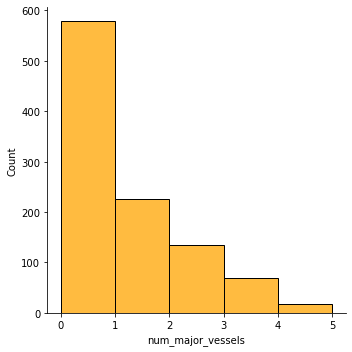

In [70]:
sns.displot(data['num_major_vessels'],bins=[0,1,2,3,4,5],color="orange")

In [71]:
data['thalassemia'].describe()

count    1025.000000
mean        2.323902
std         0.620660
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: thalassemia, dtype: float64

In [72]:
data['thalassemia']=abs(data['thalassemia'])

<AxesSubplot:>

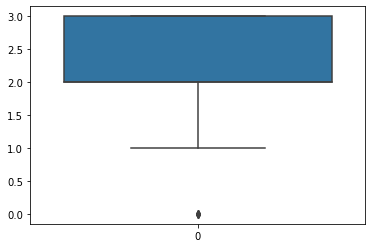

In [73]:
sns.boxplot(data=data['thalassemia'])

In [74]:
data['thalassemia'].value_counts()

2    544
3    410
1     64
0      7
Name: thalassemia, dtype: int64

Text(0, 0.5, '3 = normal; 6 = fixed defect; 7 = reversable defect')

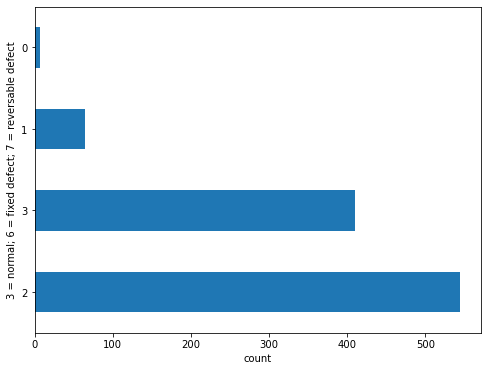

In [75]:
data['thalassemia'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("3 = normal; 6 = fixed defect; 7 = reversable defect")

In [76]:
data['target'].describe()

count     1025
unique       2
top       True
freq       526
Name: target, dtype: object

In [77]:
data['target'].value_counts()*100/len(data['target'])

True     51.317073
False    48.682927
Name: target, dtype: float64

Text(0, 0.5, 'Count')

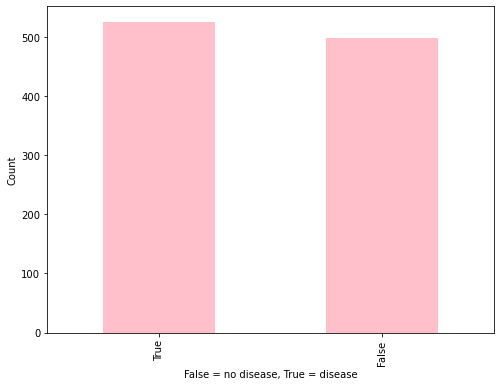

In [78]:
data['target'].value_counts().plot(kind='bar', figsize=(8, 6), color="pink")
plt.xlabel("False = no disease, True = disease")
plt.ylabel("Count")

# From the box plots we can see there are Outliers in st_depression, max_heart_rate_achieved, resting_blood_sugar and cholesterol in these variables. So lets drop the outlier value and replace the outlier using IQR.

In [79]:
#creating copy of data
data_copy = data.copy()

In [80]:
#Function to remove Outliers
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    low_rang = Q1 - (1.5 * IQR)
    upp_rang = Q3 + (1.5 * IQR)
    return low_rang, upp_rang

In [82]:
low_chol, upp_chol = remove_outlier(data_copy['cholesterol'])
low_chol
data_copy['cholesterol'] = np.where(data_copy['cholesterol']>upp_chol, upp_chol, data_copy['cholesterol'])
data_copy['cholesterol'] = np.where(data_copy['cholesterol']<low_chol, low_chol, data_copy['cholesterol'])

<AxesSubplot:xlabel='cholesterol'>

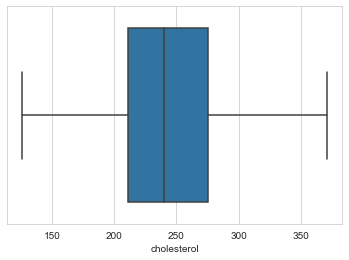

In [83]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'cholesterol', data = data_copy)

In [84]:
low_depr, upp_depr = remove_outlier(data_copy['st_depression'])
data_copy['st_depression'] = np.where(data_copy['st_depression']>upp_depr, upp_depr, data_copy['st_depression'])
data_copy['st_depression'] = np.where(data_copy['st_depression']<low_depr, low_depr, data_copy['st_depression'])

<AxesSubplot:xlabel='st_depression'>

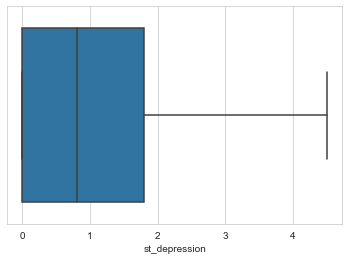

In [85]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'st_depression', data = data_copy)

In [86]:
low_hrate, upp_hrate = remove_outlier(data_copy['max_heart_rate_achieved'])
data_copy['max_heart_rate_achieved'] = np.where(data_copy['max_heart_rate_achieved']>upp_hrate, upp_hrate, data_copy['max_heart_rate_achieved'])
data_copy['max_heart_rate_achieved'] = np.where(data_copy['max_heart_rate_achieved']<low_hrate, low_hrate, data_copy['max_heart_rate_achieved'])

<AxesSubplot:xlabel='max_heart_rate_achieved'>

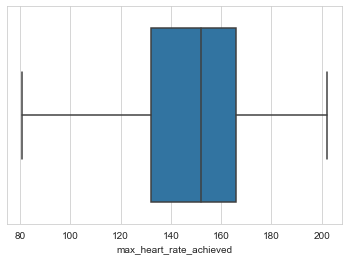

In [87]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'max_heart_rate_achieved', data = data_copy)

In [88]:
low_rbs, upp_rbs = remove_outlier(data_copy['resting_blood_sugar'])
data_copy['resting_blood_sugar'] = np.where(data_copy['resting_blood_sugar']>upp_rbs, upp_rbs, data_copy['resting_blood_sugar'])
data_copy['resting_blood_sugar'] = np.where(data_copy['resting_blood_sugar']<low_rbs, low_rbs, data_copy['resting_blood_sugar'])

<AxesSubplot:xlabel='resting_blood_sugar'>

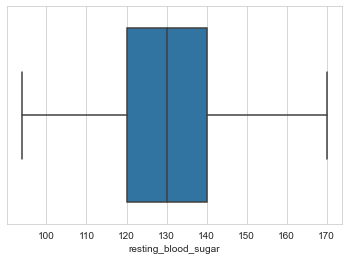

In [89]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'resting_blood_sugar', data = data_copy)

# Now we can see that Outliers are removed. Now lets perform the Analysis.

# `UNIVARIATE ANALYSIS ----------------------------------`

<AxesSubplot:ylabel='target'>

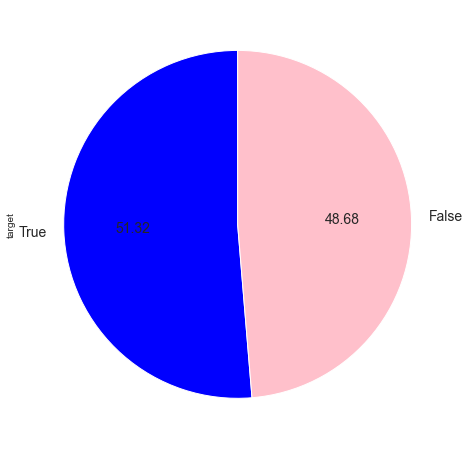

In [90]:
plt.figure(figsize=(8,8))
labels=[""]
data_copy['target'].value_counts().plot.pie(autopct="%.2f", colors=["blue","pink"], startangle=90,textprops={'fontsize': 14})


# 45.87% Of the patients detected with heart disease.

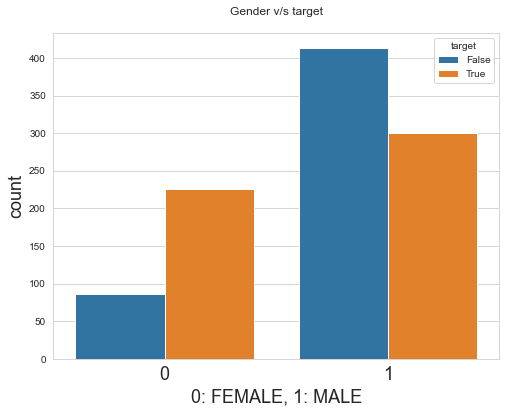

In [91]:
# DISTRIBUTION OF SEX ACCORDING TO TARGET
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x=data_copy['sex'],hue='target',data=data_copy)
plt.xlabel("0: FEMALE, 1: MALE",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title('Gender v/s target\n')
plt.show()

# Males have higher chances of having heart disease than females.

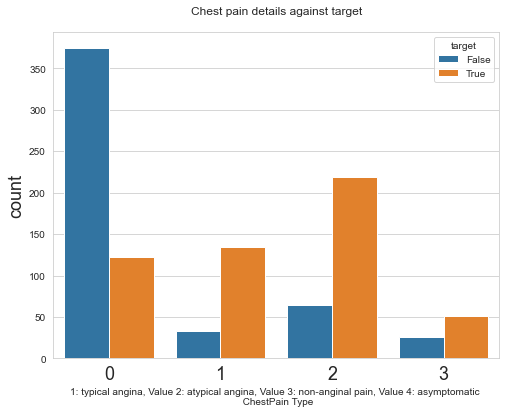

In [92]:
# distribution of chest pain type with respect to target
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x=data_copy['chest_pain_type'],hue='target',data=data_copy)
#plt.xlabel("chest_pain_type",fontsize=18)
plt.xlabel("1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic \n ChestPain Type")
plt.ylabel("count",fontsize=18)
plt.title('Chest pain details against target\n')
plt.show()
#Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic

# Patients suffering from asymptomatic chest pain are more susceptible to have heart disease.

<AxesSubplot:xlabel='resting_blood_sugar', ylabel='Count'>

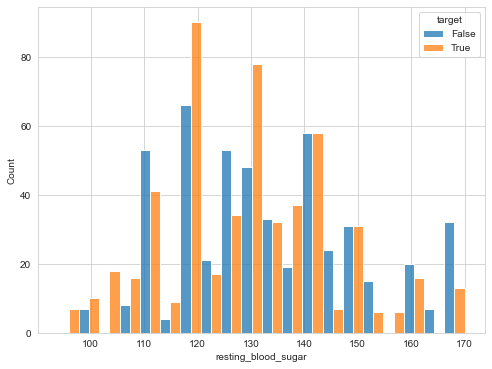

In [93]:
# Distribution of resting blood suger with respect to target
plt.figure(figsize=(8,6))
sns.histplot(data=data_copy,hue='target',x="resting_blood_sugar",multiple="dodge")

<AxesSubplot:ylabel='bins'>

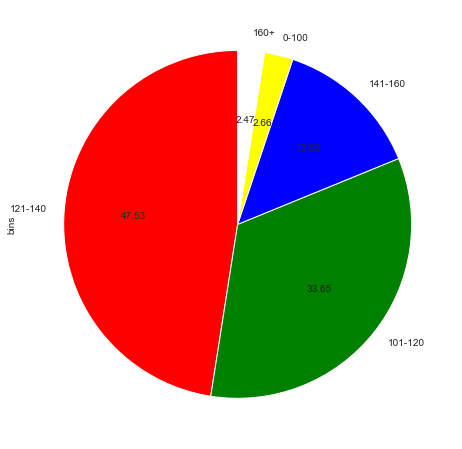

In [94]:
data_copy['bins'] = pd.cut(data_copy['resting_blood_sugar'],bins=[0,100,120,140,160,180], labels=["0-100","101-120","121-140","141-160","160+"])
plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","white"],startangle=90,fontsize=10)

# Patients having resting blood suger(diastolic state) <90mm Hg in diastolic state have less chances of heart disease

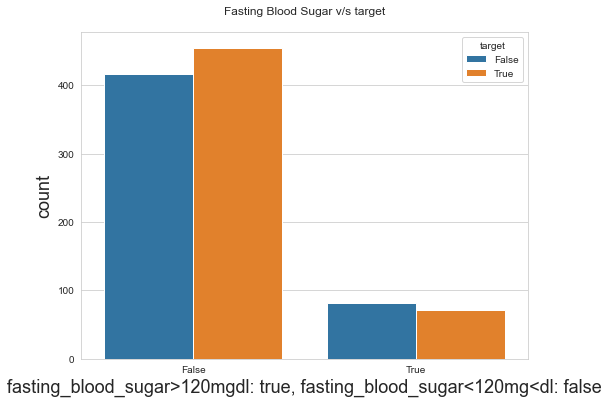

In [95]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_copy,hue='target',x="fasting_blood_sugar")
plt.xlabel("fasting_blood_sugar>120mgdl: true, fasting_blood_sugar<120mg<dl: false",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title('Fasting Blood Sugar v/s target\n')
plt.show()

# Patients having fasting blood suger >130 mg/dl have higher chances of having heart disease.



Text(0.5, 1.0, 'Age v/s target\n')

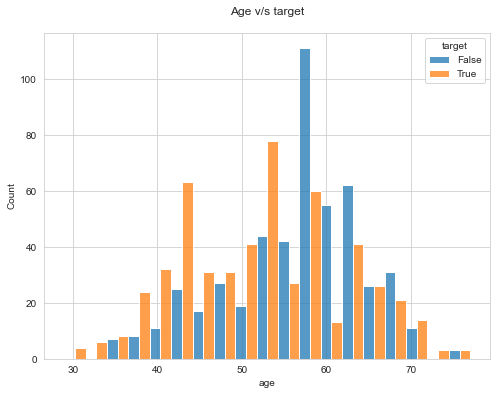

In [96]:
plt.figure(figsize=(8,6))
sns.histplot(data=data_copy,hue='target',x="age",multiple="dodge")
plt.title('Age v/s target\n')

<AxesSubplot:ylabel='bins'>

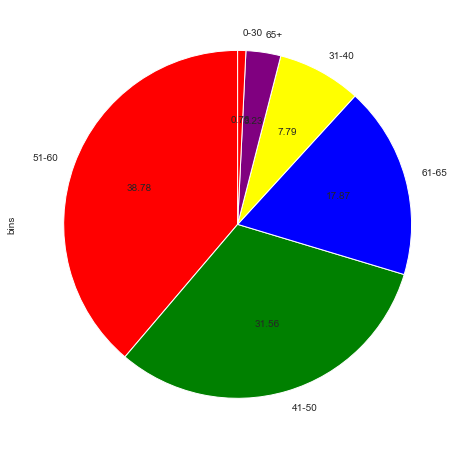

In [98]:
data_copy['bins'] = pd.cut(data_copy['age'],bins=[0,30,40,50,60,70,80], labels=["0-30","31-40","41-50","51-60","61-65","65+"])

plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","purple"],startangle=90)

# Peolpe between age 55-65 have higher chances of having heart disease.

<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

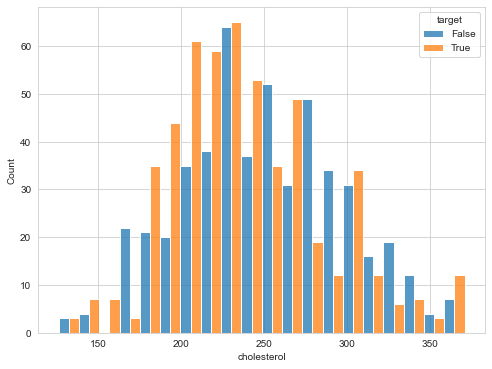

In [99]:
plt.figure(figsize=(8,6))
sns.histplot(data=data_copy,hue='target',x="cholesterol",multiple="dodge")

Text(0.0, 1.0, 'Cholestrol details against target\n')

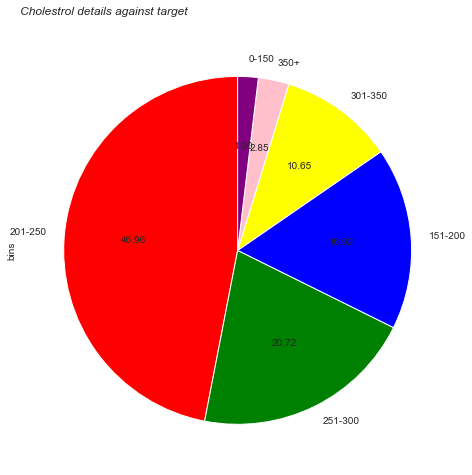

In [100]:
data_copy['bins'] = pd.cut(data_copy['cholesterol'],bins=[0,150,200,250,300,350,400], labels=["0-150","151-200","201-250","251-300","301-350","350+"])
plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple"],startangle=90,fontsize=10)
plt.title(label="Cholestrol details against target\n",loc="left",fontstyle='italic')

# Patients having cholesterol level between 200 to 300 mg/dl have higher chances of having heart disease.

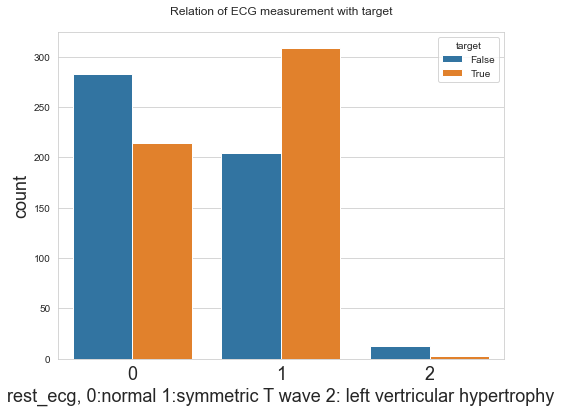

In [101]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x='rest_ecg',hue='target',data=data_copy)
plt.xlabel("rest_ecg, 0:normal 1:symmetric T wave 2: left vertricular hypertrophy",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title('Relation of ECG measurement with target\n')
plt.show()


# The above plot shows that the more number of patients showing probable or definite left ventricular hypertrophy are more likelihood of suffering from a heart disease.

<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='Count'>

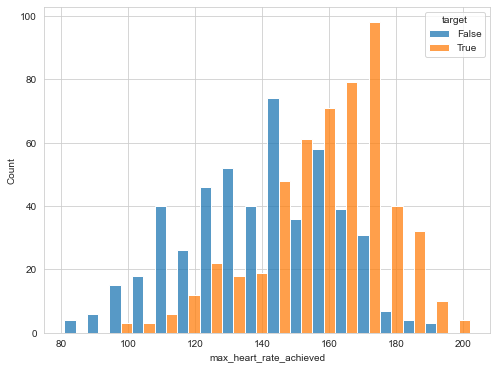

In [102]:
# Distribution of heart rate with respect to target
plt.figure(figsize=(8,6))
sns.histplot(x='max_heart_rate_achieved',hue='target',multiple='dodge',data=data_copy)

<AxesSubplot:ylabel='bins'>

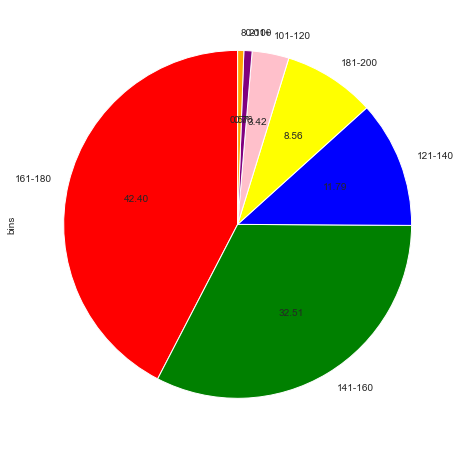

In [103]:
data_copy['bins'] = pd.cut(data_copy['max_heart_rate_achieved'],bins=[80,100,120,140,160,180,200,300], labels=["80-100","101-120","121-140","141-160","161-180","181-200","201+"])
plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple","orange"],startangle=90,fontsize=10)

# People having heart rate between 140 to 160 are likely to suffer from heart disease.

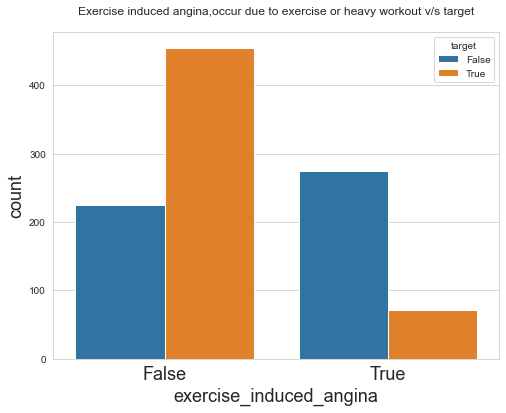

In [104]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x='exercise_induced_angina',data=data_copy, hue='target')
plt.xlabel("exercise_induced_angina",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title("Exercise induced angina,occur due to exercise or heavy workout v/s target\n")
plt.show()

#  EXERCISE INDUCED ANGINAL PAIN HAVE SLIGHTLY HIGHER CHANCES OF GETTING HEART DISEASE THAN WITHOUT EXERCISE INDUCED PAIN

<AxesSubplot:xlabel='st_depression', ylabel='Count'>

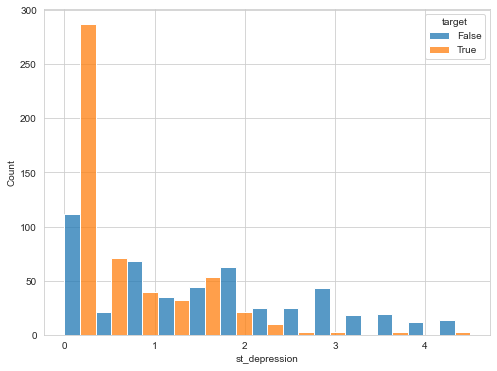

In [105]:

plt.figure(figsize=(8,6))
sns.histplot(x='st_depression',hue='target',multiple='dodge',data=data_copy)

Text(0.0, 1.0, 'ST depression details against target\n')

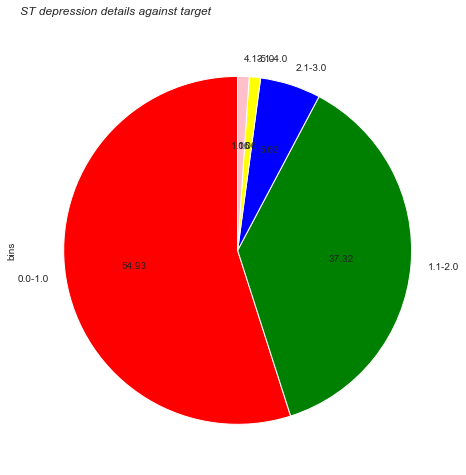

In [106]:
data_copy['bins'] = pd.cut(data_copy['st_depression'],bins=[0.0,1.0,2.0,3.0,4.0,5.0], labels=["0.0-1.0","1.1-2.0","2.1-3.0","3.1-4.0","4.1-5.0"])
plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple"],startangle=90,fontsize=10)
plt.title(label="ST depression details against target\n",loc="left",fontstyle='italic')

# People having st depression induced by exercise relative to rest >0.5 mm have higher chances of heart disease.

# Removing wrong data from variable thalassaemia and num_of_vessels.

In [107]:
thal1 = data_copy['thalassemia'].mode()
thal1

0    2
dtype: int64

In [108]:
ves1 = data_copy['num_major_vessels'].mode()
ves1

0    0
dtype: int64

In [109]:
data_copy['thalassemia'].max()

3

In [110]:
data_copy['num_major_vessels'].max()

4

In [111]:
#data_copy.loc[data_copy.thalassemia>100]=3
data_copy.loc[(data_copy.thalassemia > 100), 'thalassemia'] = data_copy['thalassemia'].mode()

In [112]:
data_copy['thalassemia'].value_counts()

2    544
3    410
1     64
0      7
Name: thalassemia, dtype: int64

In [113]:
data_copy['num_major_vessels'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: num_major_vessels, dtype: int64

In [114]:
data_copy.loc[(data_copy.num_major_vessels > 100), 'num_major_vessels'] = data_copy['num_major_vessels'].mode()

In [115]:
data_copy['num_major_vessels'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: num_major_vessels, dtype: int64

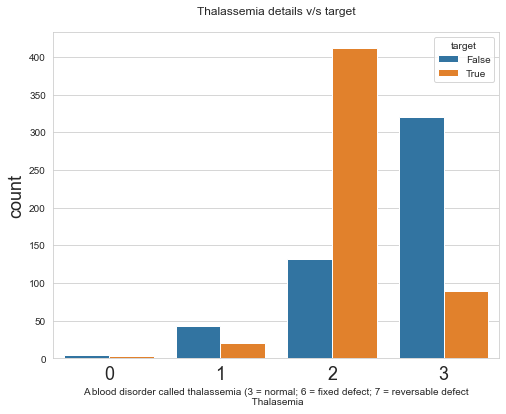

In [116]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x=data_copy['thalassemia'], hue='target', data=data_copy)
#plt.xlabel("thalasemia",fontsize=18)
plt.xlabel("A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect\n Thalasemia")
plt.ylabel("count",fontsize=18)
plt.title("Thalassemia details v/s target\n")
plt.show()

# People having reversable have higher chances of disease than people having and fixed defect thalassaemia.

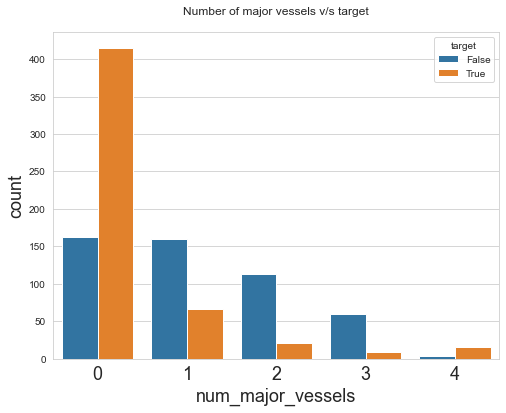

In [117]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x='num_major_vessels',data=data_copy, hue='target')
plt.xlabel("num_major_vessels",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title("Number of major vessels v/s target\n")
plt.show()

# People having having 0 & 1 major vessels have almost equal level of chances of Heart Disease.

# `BIVARIATE ANALYSIS -------------------------------`

In [118]:
data_copy.corr()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.103240,-0.071966,0.278179,0.213481,0.121243,-0.132696,-0.389986,0.088163,0.210314,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.067713,-0.181965,0.027200,-0.055117,-0.048505,0.139157,0.091250,-0.026666,0.111729,0.198424,-0.279501
chest_pain_type,-0.071966,-0.041119,1.000000,0.047868,-0.097159,0.079294,0.043581,0.306946,-0.401513,-0.172375,0.131633,-0.176206,-0.163341,0.434854
resting_blood_sugar,0.278179,-0.067713,0.047868,1.000000,0.135275,0.170346,-0.127729,-0.044016,0.046996,0.173377,-0.110336,0.105135,0.047446,-0.132301
cholesterol,0.213481,-0.181965,-0.097159,0.135275,1.000000,0.030109,-0.137856,-0.031752,0.083081,0.067534,-0.006644,0.080030,0.091881,-0.118254
fasting_blood_sugar,0.121243,0.027200,0.079294,0.170346,0.030109,1.000000,-0.104051,-0.009629,0.049261,0.014577,-0.061902,0.137156,-0.042177,-0.041164
rest_ecg,-0.132696,-0.055117,0.043581,-0.127729,-0.137856,-0.104051,1.000000,0.050195,-0.065606,-0.050546,0.086086,-0.078072,-0.020504,0.134468
max_heart_rate_achieved,-0.389986,-0.048505,0.306946,-0.044016,-0.031752,-0.009629,0.050195,1.000000,-0.383566,-0.354962,0.396394,-0.210269,-0.099493,0.423445
exercise_induced_angina,0.088163,0.139157,-0.401513,0.046996,0.083081,0.049261,-0.065606,-0.383566,1.000000,0.317703,-0.267335,0.107849,0.197201,-0.438029
st_depression,0.210314,0.091250,-0.172375,0.173377,0.067534,0.014577,-0.050546,-0.354962,0.317703,1.000000,-0.573686,0.221513,0.199712,-0.442847


<AxesSubplot:>

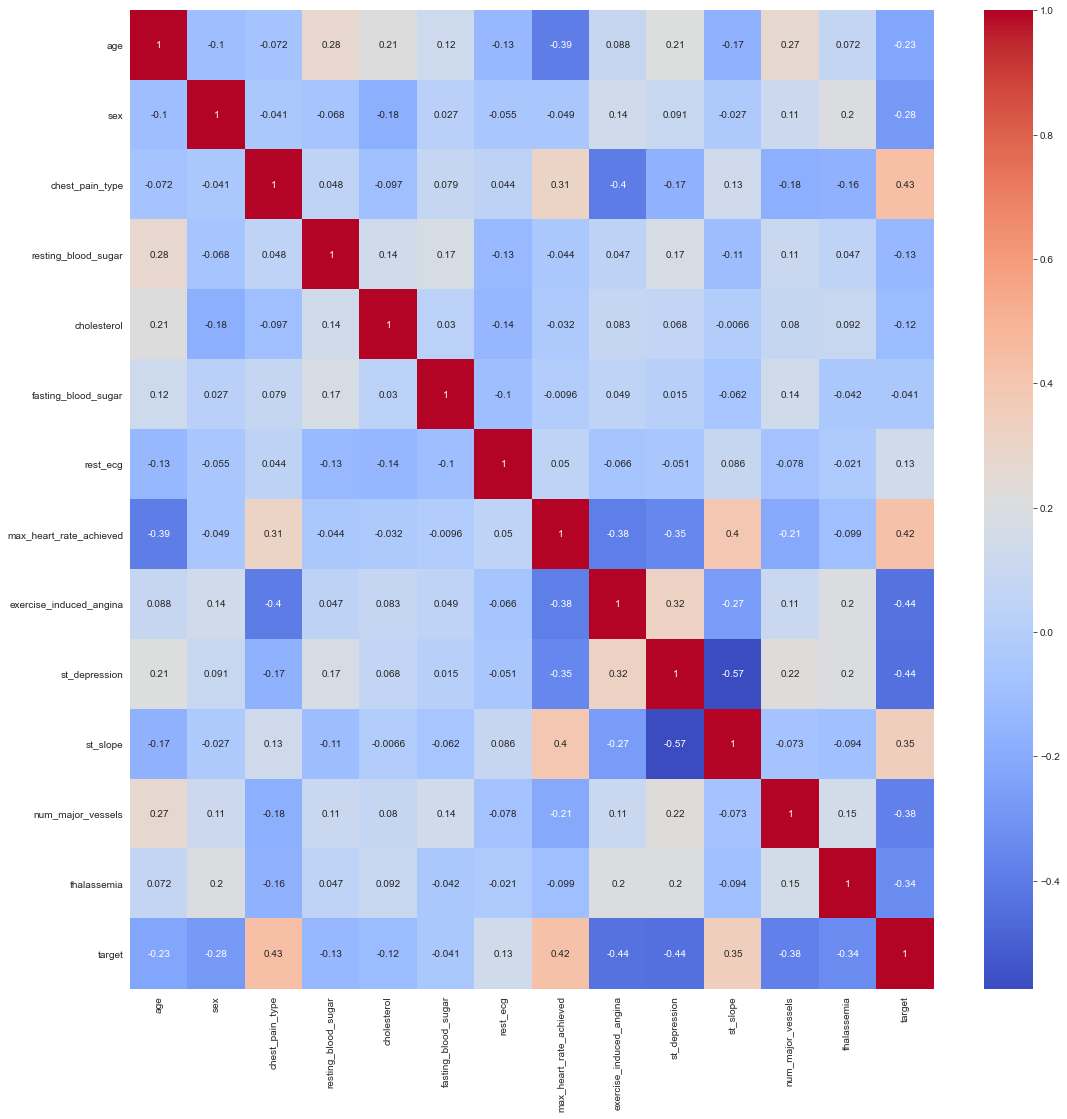

In [119]:
plt.figure(figsize=(18,18))
sns.heatmap(data_copy.corr(),annot=True, cmap = 'coolwarm')

In [120]:
data_copy_t0=data_copy.loc[data_copy["target"]==0]
data_copy_t1=data_copy.loc[data_copy["target"]==1]

# Bivariate-Numerical

Text(0.5, 1.0, 'Max Heart Rate achieved v/s Age \n')

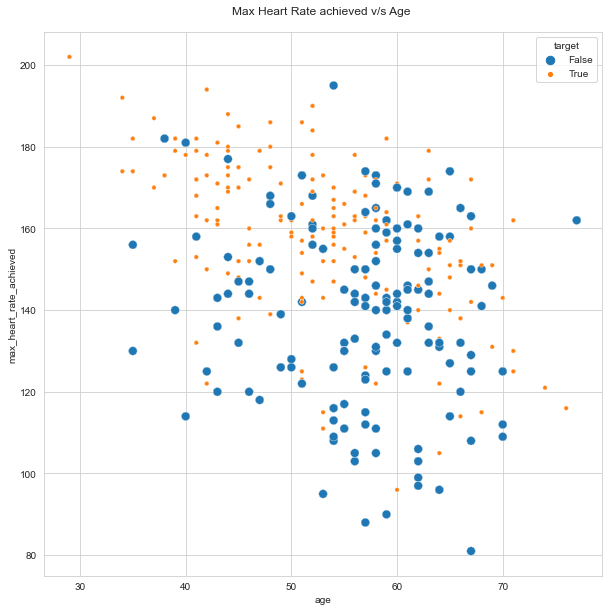

In [121]:
# from heatmap we can see...there is a correlation between age and max_haert_rate_achieved with negative correlation of -0.39
plt.figure(figsize = (10, 10))
sns.scatterplot(x='age', y='max_heart_rate_achieved',hue='target',data=data_copy,size='target')
plt.title("Max Heart Rate achieved v/s Age \n")

# There are more no of people suffering form Heart Disease, between the age 55-65 and have Heart Rate between 140-160.

Text(0.5, 1.0, 'Resting_blood_sugar v/s Age \n')

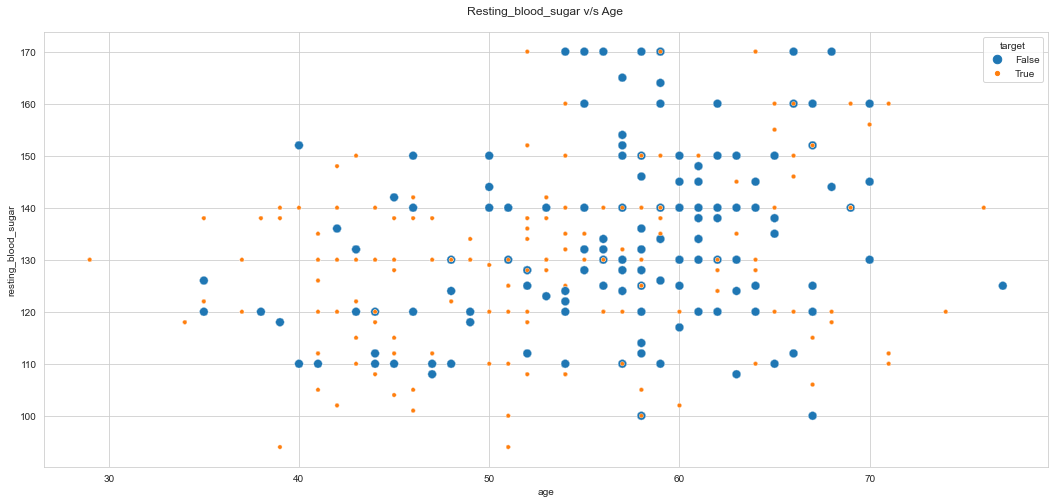

In [122]:
plt.figure(figsize = (18, 8))
sns.scatterplot(x='age', y='resting_blood_sugar',hue='target',data=data_copy,size='target')
plt.title("Resting_blood_sugar v/s Age \n")

# For people with age>50 have greater chances of having higher blood sugar (>130) and heart disease.

# It was found that blood sugar problem in people with age<40 is almost negligible, while its little high with people having age>40

Text(0.5, 1.0, 'Cholesterol v/s Age \n')

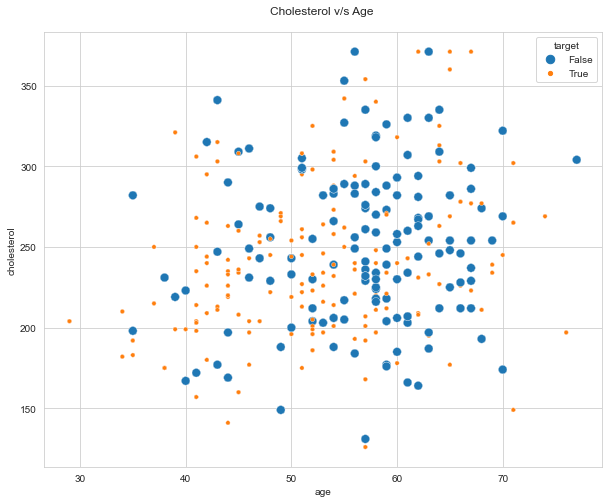

In [123]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='age', y='cholesterol',hue='target',data=data_copy,size='target')
plt.title("Cholesterol v/s Age \n")

# More people suffering from Heart Disease have age above 50 and Cholesterol Level ranges between 200-350. That means Cholesterol level is high with higher age group. 
# People with age<40  have low cholesterol level

Text(0.5, 1.0, 'Exercise included Angina for Heart Disease')

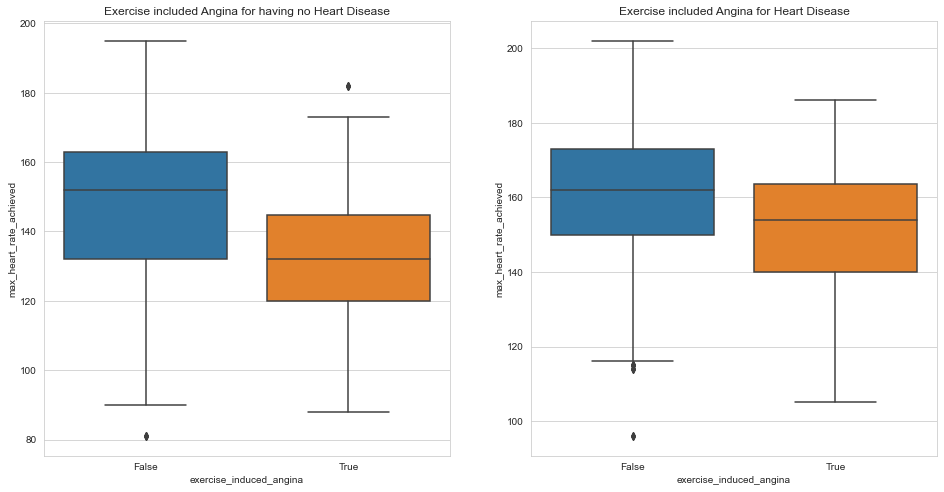

In [124]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
sns.boxplot(data = data_copy_t0, ax=ax1, x='exercise_induced_angina', y='max_heart_rate_achieved')
sns.boxplot(data = data_copy_t1, ax=ax2, x='exercise_induced_angina', y='max_heart_rate_achieved')
ax1.set_title("Exercise included Angina for having no Heart Disease")
ax2.set_title("Exercise included Angina for Heart Disease")

# There is negative correlation between max_heart_rate_achieved and exercise induced angina

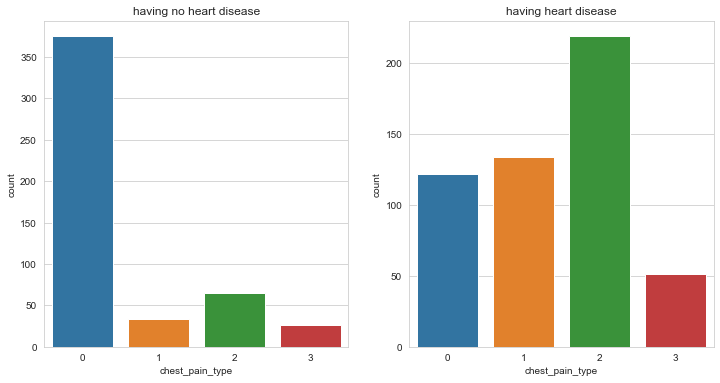

In [125]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='chest_pain_type',data=data_copy_t0,ax=ax1)
sns.countplot(x='chest_pain_type',data=data_copy_t1,ax=ax2)
ax1.set_xlabel("chest_pain_type");
ax1.set_title("having no heart disease");
ax2.set_title("having heart disease");

# People having no heart disease have chest pain of non-anginal pain that means - typically esophageal spasms (non heart related) and people having heart disease are mostly asymptomatic.

Text(0.5, 1.0, 'having heart disease')

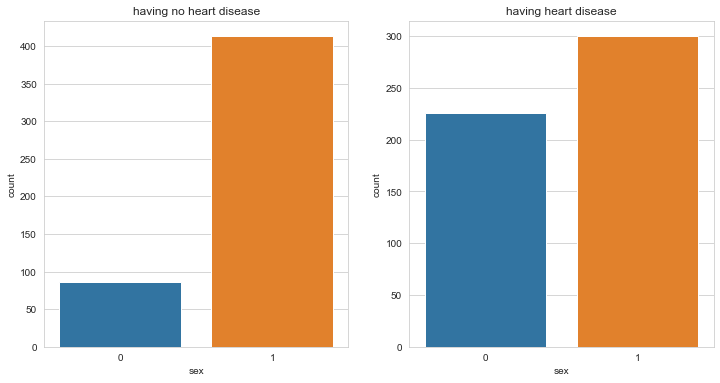

In [126]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='sex',data=data_copy_t0,ax=ax1)
sns.countplot(x='sex',data=data_copy_t1,ax=ax2)

ax1.set_title("having no heart disease")
ax2.set_title("having heart disease")

# Females have less chances of getting heart disease than males

Text(0.5, 1.0, 'Chest pain by exercise induced angina')

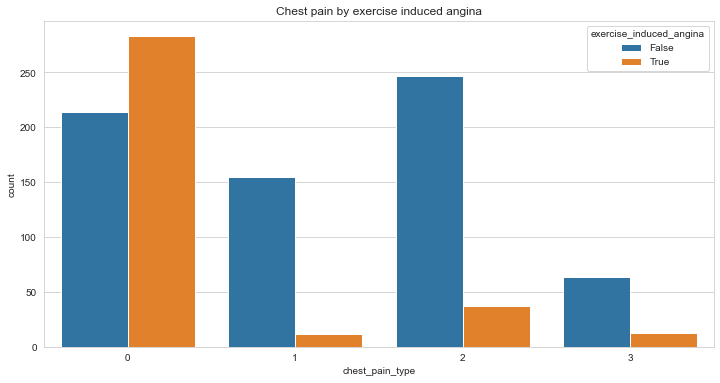

In [127]:
plt.figure(figsize=(12,6))
sns.countplot(x='chest_pain_type',data=data_copy, hue='exercise_induced_angina')
plt.title("Chest pain by exercise induced angina")

# With exercise induced angina people suffer more from type 4 chest pain that is asymptomatic - not showing signs of disease.

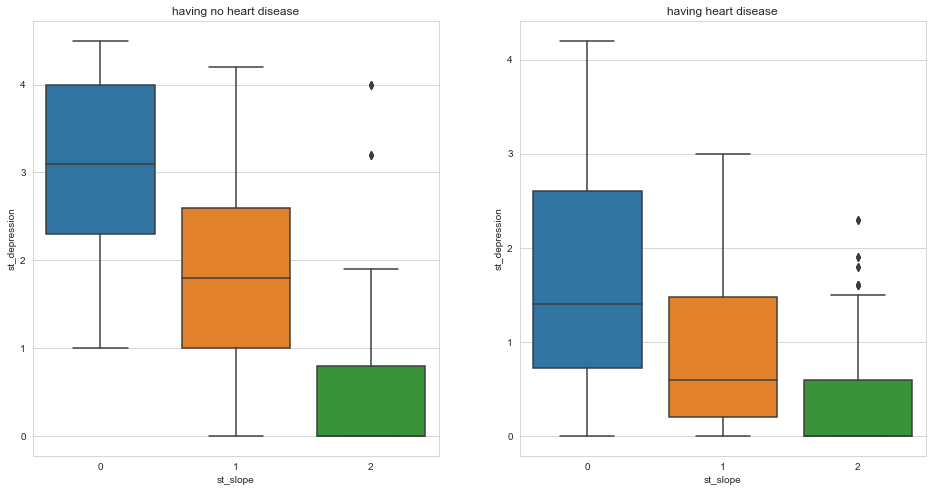

In [128]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(16,8))
sns.boxplot(data=data_copy_t0,ax=ax1,x='st_slope',y='st_depression')
sns.boxplot(data=data_copy_t1,ax=ax2,x='st_slope',y='st_depression')
ax1.set_title("having no heart disease");
ax2.set_title("having heart disease");

# st_depression>0.5 mm indicates abnormality. ECG graph showing downslope has greater chances of heart disease.

In [129]:
def chng2(prob):
    if prob == 3:
        return 'normal'
    elif prob == 6:
        return 'fixed defect'
    else:
        return 'reversable defect'
data_copy['thalassemia'] = data_copy['thalassemia'].apply(chng2)

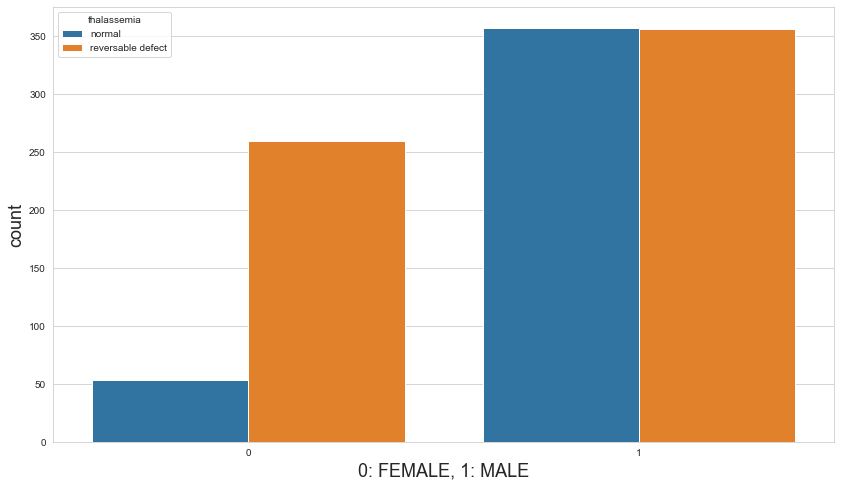

In [130]:
plt.figure(figsize=(14,8))
sns.countplot(x='sex',data=data_copy,hue='thalassemia')
plt.xlabel("0: FEMALE, 1: MALE",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.show()

# Females  havingchances of fixed defect type of thalassaemia is very rare comparison to male and male have more chances of suffering from reversable defect thalassaemia comparison to female.

Text(0.5, 0, 'thalassemia')

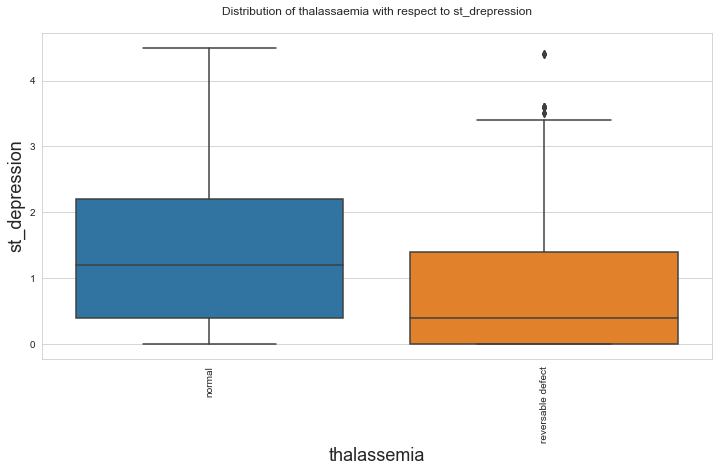

In [131]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90,fontsize=10)
plt.title("Distribution of thalassaemia with respect to st_drepression\n" )
sns.boxplot(x='thalassemia',data=data_copy, y='st_depression')
plt.ylabel("st_depression",fontsize=18)
plt.xlabel("thalassemia", fontsize=18)

# St_depression>0.5 mm shows higer chances of fixed and reversable defect thalassaemis.

Text(0.5, 1.0, 'max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n')

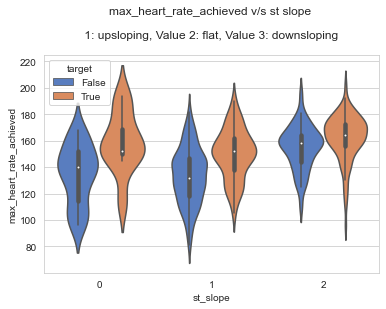

In [132]:
ax = sns.violinplot(x="st_slope", y="max_heart_rate_achieved", hue="target",data=data_copy, palette="muted")
plt.title("max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n")

# People suffering from Heart Disease, have max heart rate ranging between 120-170 and have downsloping means showing the sign of unhealthy heart.

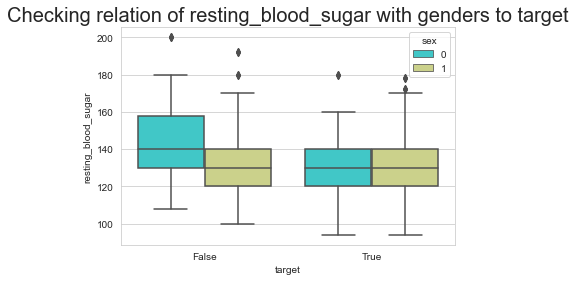

In [133]:
sns.boxplot(x = data_copy['target'], y = data['resting_blood_sugar'], hue = data['sex'], palette = 'rainbow')
plt.title('Checking relation of resting_blood_sugar with genders to target', fontsize = 20, fontweight = 30)
plt.show()

# In the above Box plot between Target and resting_blood_sugar wrt Gender, shows that Women have higher resting_blood_sugar (>=130 mm Hg) than men in case of suffering from any heart diseases, whereas men and women have almost equal tresbps in case of not suffering from a heart diseases. Also, In case of not suffering from heart diseases, patients have a slightly lower resting_blood_sugars in comparison to the patients who are suffering from heart diseases.

Text(0.5, 1.0, 'Chest Pain Type v/s target \n  (1: typical angina 2: atypical angina,  3: non-anginal pain, 4: asymptomatic)')

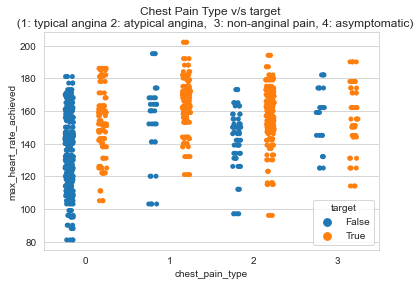

In [134]:
sns.stripplot(x ='chest_pain_type', y ='max_heart_rate_achieved', data=data_copy,jitter = True, hue ='target', dodge = True)
plt.title("Chest Pain Type v/s target \n  (1: typical angina 2: atypical angina,  3: non-anginal pain, 4: asymptomatic)")

# People suffering from Heart Disease have max_heart_rate_achieved between 100-170 range and have Asymptomatic Chest pain - chest pain not showing signs of disease.

# Notes:

# trestbps : resting blood sugar (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
# cholesterol - serum cholestoral in mg/dl : above 200 is cause for concern.
# thalach - maximum heart rate achieved : People who acheived a maximum more than 140 are more likely to have heart disease.
# oldpeak - ST depression induced by exercise relative to rest looks at stress of heart,  during excercise unhealthy heart - Downsloping - will stress more.

# Conclusions:

# 1) From target value we can say that our dataset is amost balanced with 54% of patients having no heart disease and 46 % of patients having heart disease.

# 2) Males have higher chances of having heart disease than females.

# 3) Patients with age >55 years and having resting blood suger( i.e in diastolic state) in range 121-140 mm Hg have higher chances of heart disease. patients with age group 40 to 45 have little chances and age below 40 has negligiable cgances of having a heart disease.

# 4) Patients suffering from heart disease are mostly in age group of 55-65 years.

# 5) Higher cholesterol means higher chances of heart disease. it plays an important role in determining heart problems. With age cholesterol increases and level 200- 350 mg/dl are of concern.

# 6) Patients showing definite left ventricular hypertrophy in Resting electrocardiographic measurement are more likely to suffer from a heart disease.

# 7) Patients who are likely to suffer from heart disease have higher maximum heart rates( rate between 140-160) whereas patients who are not likely to suffer from heart disease are having lower maximum heart rates.

# 8) Exercise induced anginal pain slightly higher chances of getting heart disease than without exercise induced pain.

# 9) Patients having no thalassaemia can also suffer from heart disease, but patients having reversable effect thalassaemia have greater chances of suffering from heart disease. So thalassaemia plays an important role in detecting heart disease.

# 10) St_depression >0.5 mm in ECG indicates abnormality. Therefore the slope of the peak exercise ST segment showing downslope with st_depression>0.5 mm has greater chances of heart dosease.

# 11) Female having chances of fixed defect type of thalassaemia is very rare comparison to male. Male suffers more from fixed defect thalassaemia and reverseable defect thalassaemia both comparison to female.

# 12) People suffering from Heart Disease, have max heart rate ranging between 120-160 and have downsloping means showing the sign of unhealthy heart. Range between 140-160 upsloping showed chances of heart disease. Range between 120-140 flat slope showed chances of heart disease. 

# 13) In the above Box plot between Target and resting_blood_sugar wrt Gender, shows that Women have higher resting_blood_sugar (>=130 mm Hg) than men in case of suffering from any heart diseases, whereas men and women have almost equal tresbps in case of not suffering from a heart diseases. Also, In case of not suffering from heart diseases, patients have a slightly lower resting_blood_sugars in comparison to the patients who are suffering from heart diseases.

## `END ------------------------------------------------------------`